In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from torchvision import utils
from sklearn.model_selection import train_test_split
from PIL import Image
import glob
import random
import time
import copy
import torch.nn as nn

In [2]:
test = np.load('/home/xiangjianhou/hc701-fed/preprocessed/aptos/test/0a2b5e1a0be8.npy', allow_pickle=True).item()

In [1]:
import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'HC701-PROJECT'))
sys.path.append('../../')

from hc701fed.dataset.EyePACS_and_APTOS import Eye_APTOS
from hc701fed.dataset.messidor import MESSIDOR

from torch.utils.data import ConcatDataset

import yaml

from hc701fed.transform.transforms import compose

from hc701fed.dataset.WeightedConcatDataset import WeightedConcatDataset

PATH_DATA = '/home/hong/hc701'
transforms_file = open(os.path.join(PATH_DATA, "HC701-PROJECT/hc701fed/params/transforms.yaml"), "r")
transforms_params = yaml.load(transforms_file, Loader=yaml.FullLoader)
train_transforms = compose(
    transforms_strs=transforms_params["train"],
)



Eye_APTOS_data_dir_options = {
    'EyePACS': os.path.join(PATH_DATA, 'preprocessed/eyepacs'),
    'APTOS': os.path.join(PATH_DATA, 'preprocessed/aptos'),
}

MESSIDOR_data_dir_options = {
    'messidor2': os.path.join(PATH_DATA, 'preprocessed/messidor2'),
    'messidor_pairs' : os.path.join(PATH_DATA, 'preprocessed/messidor/messidor_pairs'),
    'messidor_Etienne' : os.path.join(PATH_DATA, 'preprocessed/messidor/messidor_Etienne'),
    'messidor_Brest-without_dilation' : os.path.join(PATH_DATA, 'preprocessed/messidor/messidor_Brest-without_dilation')
}


APTOS_train = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['APTOS'], mode='train', transform=train_transforms)
EyePACS_train = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['EyePACS'], mode='train', transform=train_transforms)
MESSIDOR_2_train = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor2'], mode='train', transform=train_transforms)
MESSIDOR_pairs_train = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_pairs'], mode='train', transform=train_transforms)
MESSIDOR_Etienne_train = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Etienne'], mode='train', transform=train_transforms)
MESSIDOR_Brest_train = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Brest-without_dilation'], mode='train', transform=train_transforms)

Centerlized_train = WeightedConcatDataset([APTOS_train, EyePACS_train, MESSIDOR_2_train, MESSIDOR_pairs_train, MESSIDOR_Etienne_train,MESSIDOR_Brest_train])

horizontal_flip {'p': 0.5}
random_rotation {'degrees': [-10, 10]}


In [ ]:
APTOS_Val = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['APTOS'], mode='val', transform = None)
EyePACS_Val = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['EyePACS'], mode='val', transform = None)
MESSIDOR_2_Val = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor2'], mode='val', transform = None)
MESSIDOR_pairs_Val = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_pairs'], mode='val', transform = None)
MESSIDOR_Etienne_Val = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Etienne'], mode='val', transform = None)
MESSIDOR_Brest_Val = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Brest-without_dilation'], mode='val', transform = None)


In [2]:
test = MESSIDOR_Brest_train.calculate_weights()

In [3]:
print(test)
print(test.shape)

tensor([0.4849, 1.6071, 1.1968, 2.0833])
torch.Size([4])


In [2]:
test1 = np.load("/home/hong/hc701/preprocessed/eyepacs/train/10_left.npy", allow_pickle=True).item()

In [3]:
from torchvision import transforms
test2= transforms.ToTensor()(test1['image'])

In [9]:
labels = [3,1,2,0,0,3,3,2,2,1]
list(set(labels))

[0, 1, 2, 3]

In [4]:
test1['image'].shape

(224, 224, 3)

In [5]:
demo_array = np.moveaxis(test2.numpy()*255, 0, -1)

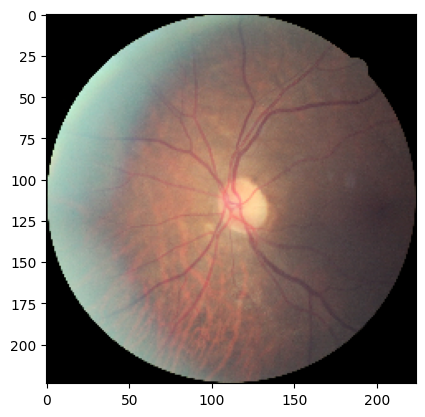

In [7]:
plt.imshow(demo_array.astype(np.uint8))

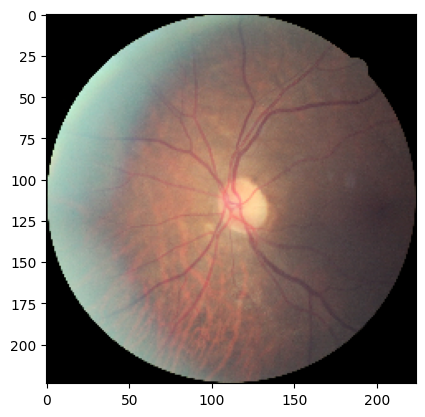

In [30]:
plt.imshow(test1["image"])

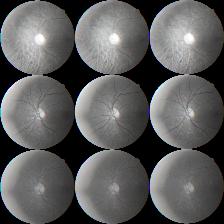

In [6]:
import yaml

import sys
sys.path.append("../../")
from hc701fed.transform.transforms import compose

transforms_file = open("/home/hong/hc701/HC701-PROJECT/hc701fed/params/transforms.yaml", "r")
transforms_params = yaml.load(transforms_file, Loader=yaml.FullLoader)
train_transforms = compose(
    transforms_strs=transforms_params["train"],
)

horizontal_flip {'p': 0.5}
random_rotation {'degrees': [-10, 10]}


In [7]:
train_transforms

Compose(
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
)

In [12]:
from PIL import Image
# transform numpy array to PIL image
img = Image.fromarray(test1['image'])

In [17]:
import timm
model = timm.create_model('resnet18', pretrained=False, num_classes=1)

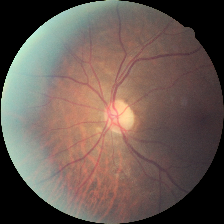

In [13]:
img

In [14]:
img = train_transforms(img)